## MIE1624-Assignment2

In recent years, with the development of data science, more and more people have started to pay attention to this field. This report aims to build ordinal classification model to predict a survey respondent's current yearly compensation bucket in Data Science and Machine Learning. All analyses in this study are based on the survey results of the "2022 Kaggle Machine Learning & Data Science Survey."

### Q1 - Data Cleaning

In the raw dataset, we could observe that several values are missing and some features are categorical. Hence I cleaned the dataset first for data analyzation

In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import random
import numpy as np

from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
# read dataset
data = pd.read_csv("clean_kaggle_data_2022.csv", encoding = "ISO-8859-1")

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
data.head()

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12,Q29_Encoded,Q29_buckets
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,NaN,NaN
1,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,"Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,2.0,"20,000-29,999"
2,501,30-34,Man,Germany,No,Coursera,edX,NaN,NaN,NaN,...,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,10.0,"100,000-124,999"
3,787,70+,Man,Australia,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,NaN,"Podcasts (Chai Time Data Science, OEEReilly...",NaN,NaN,NaN,NaN,NaN,10.0,"100,000-124,999"
4,1132,40-44,Man,United States of America,No,Coursera,NaN,Kaggle Learn Courses,NaN,Fast.ai,...,NaN,NaN,"Podcasts (Chai Time Data Science, OEEReilly...","Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,13.0,"200,000-299,999"


In [ ]:
# remove the description row, the final column(Q29_buckets), and Q29
# we remove the final column since Q29_encoded is obtained by label encoding Q29_buckets
newdata = data.iloc[1:, :-1]
newdata = newdata.drop(columns=['Q29'])
newdata.head()

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12,Q29_Encoded
1,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,2.0
2,501,30-34,Man,Germany,No,Coursera,edX,NaN,NaN,NaN,...,NaN,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,10.0
3,787,70+,Man,Australia,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,NaN,NaN,"Podcasts (Chai Time Data Science, OEEReilly...",NaN,NaN,NaN,NaN,NaN,10.0
4,1132,40-44,Man,United States of America,No,Coursera,NaN,Kaggle Learn Courses,NaN,Fast.ai,...,NaN,NaN,NaN,"Podcasts (Chai Time Data Science, OEEReilly...","Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,13.0
5,679,40-44,Man,United States of America,No,Coursera,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"Podcasts (Chai Time Data Science, OEEReilly...","Blogs (Towards Data Science, Analytics Vidhya,...","Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN,13.0


#### Combining multiple categorical values into a single category (Q4)

In [ ]:
# check how many options does user answer for each column
# if the number of answers are greater or equal to 30, then consider combining multiple categorical value to a single category.
num_option = []
index = 0
for i in newdata.columns:
  if newdata[i].nunique() >= 30:
    num_option.append([newdata[i].nunique(), index])
  index += 1
num_option

[[3103, 0], [58, 3]]

First of all, I combined multiple categorical values into a single category such as Q4. Because there were a lot of unique country names based on answers of Q4, we only considered countries that appeared greater or equal to a certain frequency. Everything else we could replace with "Other". The frequency threshold was setted to be 140.

In [ ]:
country_counts = newdata.Q4.value_counts()

value_mask = newdata.Q4.isin(country_counts.index[country_counts < 140])
newdata.loc[value_mask,'Q4'] = "Other"

newdata.Q4.value_counts()

Other                       3450
India                       2328
United States of America    1434
Japan                        333
Brazil                       292
Nigeria                      159
Spain                        140
Name: Q4, dtype: int64

#### convert categorical data into numerical data by encoding (including remove na values)

Then I converted several variables which are made of categorical data into numerical data by different types of encoding.


##### dummy encodings

This dataset represents survey questions. Some of the questions in this survey could select multiple options, such as question 6. Therefore I chose to use a variation of the one-hot encoding technique called "dummy variables". For each observation, set the value of the binary variables to 1 or 0 depending on whether the option was selected or not and in the case where no option was selected, we set a default value of 0.



In [ ]:
#for multiple-choices question (select all that apply).
for col in newdata.columns:
  if "_" in col and col != "Q29_Encoded":
    newdata = pd.get_dummies(data=newdata, columns=[col])

##### Dealing with N/A values

After that, I checked the N/A values for the rest variables. Dropped variables with a great portion of nan values. Besides, there was an inferent ordinal relationship among the answers in Q30, and the portion of nan values were relatively small. Thus I simply removed the rows.


In [ ]:
# count the nan values for each column
for col in newdata.columns:
  if "_" not in col and col != "Q29_Encoded":
    print(col, newdata[col].isna().sum())

Duration (in seconds) 0
Q2 0
Q3 0
Q4 0
Q5 0
Q8 0
Q9 2941
Q11 0
Q16 684
Q22 6522
Q23 0
Q24 0
Q25 0
Q26 0
Q27 0
Q30 50
Q32 6275
Q43 3723


In [ ]:
# since the nan values in Q9, Q16, Q22, Q32 and Q43 has a great portion, I decided to drop them.
# Besides, there is an inferent ordianl relationship among the answers in Q30, and the portion of nan values are relatively small.
# Thus, simply remove the rows.
newdata = newdata.drop(columns=['Q9', 'Q16', 'Q22', 'Q32', 'Q43'])
newdata = newdata.dropna(subset=['Q30'])

Since Q5 has only 1 category "no", we drop this variable. Besides, Q8, Q26 cannot be read properly (garbled code), so we will also drop it.

In [ ]:
newdata = newdata.drop(columns=['Q5', 'Q8', 'Q26'])

##### label encoding

For the rest variables, use label encoding if there is an inherent ordinal relationship among answers such as question 2. Otherwise, use one-hot encoding for single-choice questions.


In [ ]:
# Q2
# Define the natural order of the categories
natural_order2 = [['18-21', '22-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-69','70+' ]]
oe2 = OrdinalEncoder(categories=natural_order2)
# Fit and transform the data using the natural order
newdata["Q2"] = oe2.fit_transform(newdata[['Q2']])

In [ ]:
# Q11
# Define the natural order of the categories
natural_order11 = [['I have never written code', '< 1 years', '1-3 years', '3-5 years', '5-10 years', '10-20 years', '20+ years']]
oe11 = OrdinalEncoder(categories=natural_order11)
# Fit and transform the data using the natural order
newdata["Q11"] = oe11.fit_transform(newdata[['Q11']])

In [ ]:
# Q25
# Define the natural order of the categories
natural_order25 = [['0-49 employees', '50-249 employees', '250-999 employees', '1000-9,999 employees', '10,000 or more employees']]
oe25 = OrdinalEncoder(categories=natural_order25)
# Fit and transform the data using the natural order
newdata["Q25"] = oe25.fit_transform(newdata[['Q25']])

In [ ]:
# Q27
# Define the natural order of the categories
natural_order27 = [['I do not know', 'No (we do not use ML methods)',
                    'We use ML methods for generating insights (but do not put working models into production)',
                    'We are exploring ML methods (and may one day put a model into production)',
                    'We recently started using ML methods (i.e., models in production for less than 2 years)',
                    'We have well established ML methods (i.e., models in production for more than 2 years)']]
oe27 = OrdinalEncoder(categories=natural_order27)
# Fit and transform the data using the natural order
newdata["Q27"] = oe27.fit_transform(newdata[['Q27']])

In [ ]:
# Q30
# Define the natural order of the categories
natural_order30 = [['$0 ($USD)', '$1-$99', '$100-$999', '$1000-$9,999', '$10,000-$99,999', '$100,000 or more ($USD)']]
oe30 = OrdinalEncoder(categories=natural_order30)
# Fit and transform the data using the natural order
newdata["Q30"] = oe30.fit_transform(newdata[['Q30']])

##### One-hot encoding

In [ ]:
#for single-choices questions.
single_choice = ["Q3", "Q4", "Q23", "Q24"]
for col in single_choice:
  newdata = pd.get_dummies(data=newdata, columns=[col])

In [ ]:
newdata.head()

,Duration (in seconds),Q2,Q11,Q25,Q27,Q30,Q29_Encoded,Q6_1_Coursera,Q6_2_edX,Q6_3_Kaggle Learn Courses,...,Q24_Government/Public Service,Q24_Insurance/Risk Assessment,Q24_Manufacturing/Fabrication,Q24_Marketing/CRM,Q24_Medical/Pharmaceutical,Q24_Non-profit/Service,Q24_Online Service/Internet-based Services,Q24_Other,Q24_Retail/Sales,Q24_Shipping/Transportation
1,851,8.0,5.0,0.0,4.0,3.0,2.0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
2,501,3.0,5.0,2.0,5.0,0.0,10.0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
3,787,10.0,6.0,3.0,4.0,2.0,10.0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
4,1132,5.0,5.0,3.0,5.0,2.0,13.0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
5,679,5.0,5.0,3.0,5.0,5.0,13.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Q2. Exploratory data analysis and feature selection

#### exploratory data analysis

In order to pick the most related to Q29_Encoded variables among 325 features to fit the logistic regression model, we will visualize the order of feature importance through a heatmap of correlation.

<AxesSubplot:>

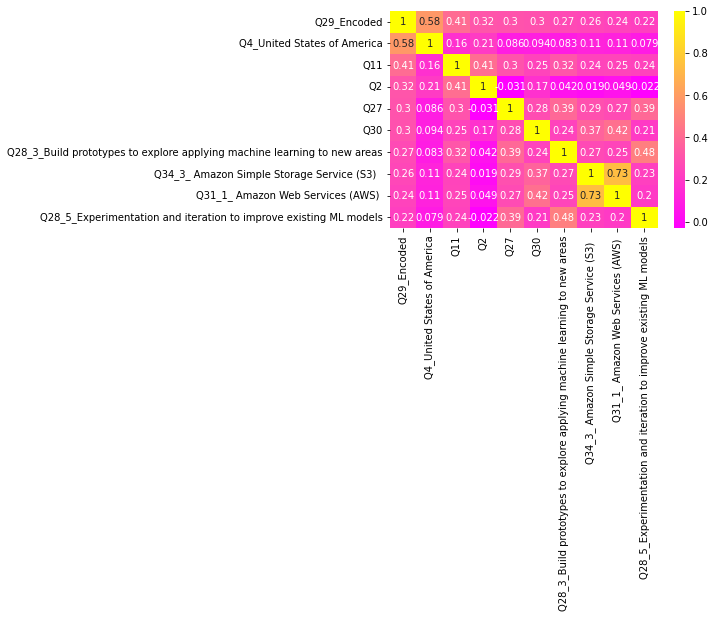

In [ ]:
# using corr plot to visualizes the order of feature importance
# Since there are over 300 variables, we will choose the top 10 variables that has the highest correlation score to Q29_Encoded.

import seaborn as sns

corr = newdata.corr()
q29corr = corr["Q29_Encoded"]
q29top = q29corr.nlargest(10).index.tolist()
corr = corr.loc[q29top, q29top]

sns.heatmap(corr, annot=True, cmap='spring')


According to the heatmap, the most important features related to respondent’s yearly compensation are respondents living in United States of America (Q4_United States of America), years have been programming(Q11), age(Q2), employer incorporate machine learning methods or not(Q27) and amount of money spent on machine learning(Q30).

#### Feature engineering/selection

Feature engineering is the process of selecting and manipulating raw data to generate meaningful features for predictions or analysis. Since the performance of the predictive model is highly dependent on input features, feature engineering could improve model accuracy and interpretation. If feature engineering does not apply in this task, the model would be built depending on over 300 features, which would cause a higher probability of overfitting.


Hence we use Lasso regression to select features based on our training data. Lasso regression is a regularized regression that is used to select important features by shrinking the coefficients of less important features to zero. We also tune the hyperparameter alpha to make Lasso regression perform best

First of all, we need to split the data into training and testing dataset. After that, we use grid search to find the best value for the hyperparameter alpha of Lasso regression(set alpha = 0.1). Then we check the performance of the regression using the optimal hyperparameters via cross validation. In cross-validation, we partition the training set into various training and testing sets and we use these sets to train and test the model multiple times.Finally, use 10000 iterations to find the top 10 important features.


In [ ]:
# split the data into training and testing dataset
from sklearn.model_selection import train_test_split

target_data = newdata['Q29_Encoded']
feature_data = newdata.drop(columns=['Q29_Encoded'])

X_train,X_test, y_train, y_test= train_test_split(feature_data, target_data, test_size=0.33, random_state=13)

In [ ]:
#set up cross validation
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, auc, mean_absolute_error

def run_kfold(model, X, Y):

    kf = KFold(n_splits=10) #n_splits previously n_folds

    scores = []
    fold = 0

    for train_index, test_index in kf.split(X):
        fold += 1
        X_train, X_test = X.values[train_index], X.values[test_index]
        Y_train, Y_test = Y.values[train_index], Y.values[test_index]

        model.fit(X_train, Y_train)
        predictions = model.predict(X_test)

        score = r2_score(Y_test, predictions) # can try different metrics (e.g., Mean absolute error)
        scores.append(score)
        print("Fold {0} R2 score: {1}".format(fold, score))

    mean_score = np.mean(scores)
    std_score=np.std(scores)
    print("Mean R2 score: {0}".format(mean_score))
    print("Standard Deviation: {0}".format(std_score))

In [ ]:
# grid search to find best hyperparameter value (alpha)
from sklearn.metrics import make_scorer, r2_score, confusion_matrix
from sklearn import linear_model

reg_gridsearch = linear_model.Lasso(random_state=42)
#Parameters to test
parameters = {'alpha':np.arange(0.1,3,0.1)}, # Constant that multiplies the L1 term. Defaults to 1.0.

# Compare parameters by score of model
acc_scorer_lm = make_scorer(r2_score)

# Run the grid search
grid_obj_lm = GridSearchCV(reg_gridsearch, parameters, scoring=acc_scorer_lm)
grid_obj_lm = grid_obj_lm.fit(X_train, y_train)

reg_gridsearch = grid_obj_lm.best_params_  #Select best parameter combination

In [ ]:
reg_gridsearch # print out the optimal params so grid search does not need to be rerun

{'alpha': 0.1}

In [ ]:
# Lasso Regression with alpha = 0.1
from sklearn import linear_model

reg = linear_model.Lasso(alpha = 0.1,max_iter=10000)
reg.fit(X_train, y_train)

Lasso(alpha=0.1, max_iter=10000)

In [ ]:
run_kfold (reg, X_train, y_train)

Fold 1 R2 score: 0.517092174004113
Fold 2 R2 score: 0.5054920600954624
Fold 3 R2 score: 0.5357557792555097
Fold 4 R2 score: 0.55861799252051
Fold 5 R2 score: 0.5080734804686144
Fold 6 R2 score: 0.47759609041998174
Fold 7 R2 score: 0.5104703299761795
Fold 8 R2 score: 0.5035509508257001
Fold 9 R2 score: 0.5294664918875878
Fold 10 R2 score: 0.5492230626935928
Mean R2 score: 0.5195338412147252
Standard Deviation: 0.02280718694969505


In [ ]:
# Get the coefficients of the model and sort them by magnitude
# Get the top 10 features with highest absolute coefficients
sorted(list(zip(abs(reg.coef_), X_train)),reverse=True)[0:10]

[(4.6221736139903875, 'Q4_United States of America'),
 (0.8781759465482667, 'Q4_India'),
 (0.3902320031090803, 'Q11'),
 (0.3572734688478671, 'Q27'),
 (0.34480623094867036, 'Q30'),
 (0.25497764794619615, 'Q25'),
 (0.22240063251172768, 'Q24_Academics/Education'),
 (0.20992172836810916, 'Q2'),
 (0.20769676378751775,
  'Q28_3_Build prototypes to explore applying machine learning to new areas'),
 (0.18671514216732235, 'Q34_3_ Amazon Simple Storage Service (S3)  ')]

### Q3. Model implementation

The goal of this task is to build a ordinal logistic regression model to predict the currect yearly compensation bucket of a survey respondent. After finding the most important features through Lasso regression, we selected top 10 important features and created a new dataset, which will be used in ordinal logistic regression model.


##### new dataset

In [ ]:
import warnings
#warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore")

In [ ]:
# import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
# select the top 10 features and create a new dataset
# split the new dataset into training and testing dataset
newdata2 = newdata[['Q29_Encoded', 'Q4_United States of America', 'Q4_India','Q11', 'Q27', 'Q30', 'Q25','Q24_Academics/Education','Q2','Q28_3_Build prototypes to explore applying machine learning to new areas','Q34_3_ Amazon Simple Storage Service (S3)  '  ]]

target_data2 = newdata2['Q29_Encoded']
feature_data2 = newdata2.drop(columns=['Q29_Encoded'])

X_train2,X_test2, y_train2, y_test2= train_test_split(feature_data2, target_data2, test_size=0.33, random_state=13)

##### Implement ordinal logistic model and compute model accuracy, average and variance of accuracy

Since the target value(Q29_Encoded) is not binary, we need to build an ordinal logistics regression. However there is no built-in function supporting ordinal logistic regression in the Python library, I chose to build it by using multiple logistic regression models. We could treat each ordinal class as a binary classification problem, where we compared each class to all the lower classes combined. For example, if the current class is 0, then we will compare class 0 vs class 1-14. (there are 15 classes in Q29_encoded: 0,1,2,...,14). In this situation, we will encode class 0 as 0 and class 1-14 as 1.

After fitting all the single logistic regression models, I merged and then subtracted the probability of next encoded class 0 to current encoded class 0 in order to get the true probability of the current class (Make predictions by comparing probabilities of adjacent encoded classes). The prediction of the ordinal logistic regression would be the class with the highest probability among all classes.

It is worth mentioning that we also applied normalization on features since it could bring the features to the same scale and prevent features with large magnitudes from dominating the model.


In [ ]:
newdata2.Q29_Encoded.nunique()

15

In [ ]:
# implement ordinal logistic regression model using multiple logistic regression model
# if the current state of Q29_Encoded is greater than setted class(n), set it to 1, otherwise set it to 0
# source:https://www.kaggle.com/code/ronennakash/ordinal-logistic-regression-solution/notebook#Ordinal-Logistic-regression

def single_lr(X_train, y_train, X_test, y_test, C, solver, n):
  # n is the current state in Q29_Encoded. since there are 15 classes in Q29_Encoded(0,1,...,14)
  #X_train = X_train2

  # create X_train_t a new dataframe which contains target data of training dataset
  X_train_t = X_train.copy()
  X_train_t['Q29_Encoded'] = y_train

  # copy X_train_t as a new dataframe  X_train_n.

  X_train_n = X_train_t.copy()

  # loop the target value of the dataset
  # convert the Q29_Encoded of X_train_n so that we could transform the target into binary classification.
  # if the current state of Q29_Encoded is greater than setted class(n), set it to 1, otherwise set it to 0
  # (eg. class 12 vs. class 13,14,15)
  for target in range (X_train.shape[0]):
    if (X_train_t['Q29_Encoded'].iloc[target] > n):
       X_train_n['Q29_Encoded'].iloc[target]=1
    else:
       X_train_n['Q29_Encoded'].iloc[target]=0

  # divide the new dataframe into target value and data value.
  ytrain = X_train_n["Q29_Encoded"]
  xtrain = X_train_n.drop(columns=['Q29_Encoded'])

  # not using normalization since we need to set the result in the given range 0-1
  scaler = StandardScaler()
  xtrain = scaler.fit_transform(xtrain)
  xtest = scaler.fit_transform(X_test)

  model1 = LogisticRegression(C = C, solver = solver)
  model1.fit(xtrain, ytrain)

  # Probability estimates of xtest
  probability = model1.predict_proba(xtest)
  return probability


Combine all single logistic regression model to an ordinal logistic regression model

In [ ]:
# implement ordinal logistic regression model by merging 14 logistic model (n = 0,1,2,...,13)
def olr(X_train, y_train, X_test, y_test, C, solver):
  prob_all = []
  for n in range(newdata2.Q29_Encoded.nunique() - 1): #n = 0-13
    prob = single_lr(X_train, y_train, X_test, y_test, C, solver, n)  #shape(2669, 2) represent probability of encoded class 0 vs. encoded class 1
    prob_all.append(prob)

  # Make predictions by comparing probabilities of adjacent encoded class.
  # compute the probability of current class n.
  prob_final = [] # class 0(n = 0)

  for k in range(X_test.shape[0]): # loop all the rows in testing dataset k = 0-2668
    prob_n = []
    prob_n.append(prob_all[0][k][0]) #append probability of class 0

    for i in range(len(prob_all)-1): # i = 0-12 # loop the predicted probability of logistic regression model
      current = prob_all[i][k][0] # current loop index, prob of encoded class n-1
      next = prob_all[i+1][k][0] # next loop index, prob of encoded class n
      true_prob = next - current # prob of true class n (i+1)

      prob_n.append(true_prob) # append probabilty of the current row

    prob_n.append(prob_all[len(prob_all)-1][k][1]) #append probability of class 14

    # find the class with highest probability for each row
    maxvalue = max(prob_n)
    maxindex = prob_n.index(maxvalue)
    prob_final.append(maxindex)

  return prob_final

In [ ]:
# set 10 cross-validation

kfold = KFold(n_splits=10)
kfold.get_n_splits(feature_data2)

accuracy = np.zeros(10)
np_idx = 0

for train_idx, test_idx in kfold.split(feature_data2):
    X_train, X_test = feature_data2.values[train_idx], feature_data2.values[test_idx]
    y_train, y_test = target_data2.values[train_idx], target_data2.values[test_idx]

    X_train = pd.DataFrame(X_train)
    X_test = pd.DataFrame(X_test)

    prob_final = olr(X_train, y_train, X_test, y_test, 0.1, "newton-cg")

    # compute accuracy
    count = 0
    for i in range(len(y_test)):
      if y_test[i] == prob_final[i]:
        count += 1
    accuracy[np_idx] = (count/len(y_test))*100
    np_idx += 1

    print ("Fold {}: Accuracy: {}%".format(np_idx, round(count/len(y_test),3)))

print ("Average Accuracy: {}%, Standard Deviation:{}%".format(round(np.mean(accuracy),3),round(np.std(accuracy),3)))

Fold 1: Accuracy: 0.409%
Fold 2: Accuracy: 0.377%
Fold 3: Accuracy: 0.409%
Fold 4: Accuracy: 0.435%
Fold 5: Accuracy: 0.418%
Fold 6: Accuracy: 0.396%
Fold 7: Accuracy: 0.421%
Fold 8: Accuracy: 0.41%
Fold 9: Accuracy: 0.392%
Fold 10: Accuracy: 0.4%
Average Accuracy: 40.663%, Standard Deviation:1.552%


Next we check the performance of the ordinal logistic regression with hyperparameters C=0.1 and solver = "newton-cg" via 10 fold cross validation. Based on the results, the fold 4 has the highest accuracy 43.5%, the average accuracy for all 10 folds is 40.663% and the corresponding standard deviation of accuracy is around 0.0155.

#### try several models and give reasons on bias-variance trade-off

Since we could adjust the model performance by tuning the hyperparameters of the ordinal logistic regression. Hence I investigate several C values to find the model that performs the best. The selected C values are 0.01,0.05,0.1.

In [ ]:
# compute bias and variance
import statistics as st

bias_all = []
var_all = []

for C in [0.01,0.05,0.1]:

  accuracy = np.zeros(10)
  np_idx = 0

  for train_idx, test_idx in kfold.split(feature_data2):
    X_train, X_test = feature_data2.values[train_idx], feature_data2.values[test_idx]
    y_train, y_test = target_data2.values[train_idx], target_data2.values[test_idx]

    X_train = pd.DataFrame(X_train)
    X_test = pd.DataFrame(X_test)

    prob_final = olr(X_train, y_train, X_test, y_test, C, "newton-cg")

    # compute accuracy
    count = 0
    for i in range(len(y_test)):
      if y_test[i] == prob_final[i]:
        count += 1
    accuracy[np_idx] = (count/len(y_test))*100
    np_idx += 1

    bias = np.mean(np.power(np.array(pd.to_numeric(prob_final)) - np.array(pd.to_numeric(y_test)), 2))
    var = np.var(pd.to_numeric(np.array(prob_final)))

    bias_all.append(bias)
    var_all.append(var)

  print("C:", C, "squared bias:", st.mean(bias_all), "variance:",st.mean(var_all))
  print ("Average Accuracy: {}%, Standard Deviation:{}%".format(round(np.mean(accuracy),3),round(np.std(accuracy),3)))

C: 0.01 squared bias: 16.24329434334039 variance: 19.145054579400867
Average Accuracy: 40.712%, Standard Deviation:1.453%
C: 0.05 squared bias: 15.944844432681835 variance: 19.59307287928967
Average Accuracy: 40.626%, Standard Deviation:1.466%
C: 0.1 squared bias: 15.828872788391324 variance: 19.796072824466886
Average Accuracy: 40.663%, Standard Deviation:1.552%


The bias-variance trade-off for the optimal model is analyzed below. For the multiclass classification problem, the bias is defined as the mean of the squared error between predictions and true value. The variance is the mean of the variance in each fold. The following result shows the bias and variance of logistic regression with different hyperparameter C.

Based on the result, we could observe as the hypermeter C increases, the bias decreases and the variance increases. This is because smaller C values specify a stronger regularization and penalize the large weights. Hence a higher C is more likely leading to overfitting because of high model complexity. In this case, the model may have a high variance and capture lots of noise from training data. Therefore, it may not generalize on new testing data and get a lower accuracy. Viceversa, a higher C may lead to underfitting and have a small variance.

By comparing the average accuracy of the models, the model with hyperparameters C = 0.01 and solver = "newton-cg '' performed the best with the average accuracy 40.712%. It may be because the model achieved a better balance between bias and variance, leading to a relatively small probability of overfitting or underfitting.


### Q4. Model tuning

##### optimal logistic regression model

When performing grid search to find the optimal ordinal logistic regression model, I used the F1 score as the evaluation metric instead of accuracy. This is because the model always predicts the majority class will have a high accuracy when the dataset is imbalanced. While F1 score takes into both precision and recall, leading to a less impact on an imbalanced dataset.

The result of grid search on F1 showed when the hyperparameter C is tuned to 0.5 and solve is setted as newton-cg, the ordinal logistic regression model has the best performance.


In [ ]:
from sklearn.metrics import f1_score
# grid search on f1 score to find best hyperparameters of logistic regression.

best_params = {}
best_accuracy = 0
best_std = 0

for C in [0.1,0.5,1]:
    for solver in ['newton-cg','lbfgs','liblinear','sag']:
        accuracy = np.zeros(10)
        np_idx = 0

        for train_idx, test_idx in kfold.split(feature_data2):
            X_train, X_test = feature_data2.values[train_idx], feature_data2.values[test_idx]
            y_train, y_test = target_data2.values[train_idx], target_data2.values[test_idx]

            X_train = pd.DataFrame(X_train)
            X_test = pd.DataFrame(X_test)

            prob_final = olr(X_train, y_train, X_test, y_test, C, solver)

            f1 = f1_score(y_test, prob_final, average='weighted')

            accuracy[np_idx] = f1
            np_idx += 1

        if np.mean(accuracy) > best_accuracy:
            best_params = {'C':C, 'solver':solver}
            best_accuracy = np.mean(accuracy)
            best_std = np.std(accuracy)

print (best_params)
print ("Best Score: {}%({}%)".format(round(best_accuracy,3),round(best_std,3)))

{'C': 0.5, 'solver': 'newton-cg'}
Best Score: 0.275%(0.02%)


#### feature importance

To plot the feature importance of the ordinal logistic regression model, we compute the means of coefficients of logistic models.

In [ ]:
def single_lr_feature(X_train, y_train, X_test, y_test, C, solver, n):
  # n is the current state in Q29_Encoded. since there are 15 classes in Q29_Encoded(0,1,...,14)
  #X_train = X_train2

  # create X_train_t a new dataframe which contains target data of training dataset
  X_train_t = X_train.copy()
  X_train_t['Q29_Encoded'] = y_train

  # copy X_train_t as a new dataframe  X_train_n.

  X_train_n = X_train_t.copy()

  # loop the target value of the dataset
  # convert the Q29_Encoded of X_train_n so that we could transform the target into binary classification.
  # if the current state of Q29_Encoded is greater than setted class(n), set it to 1, otherwise set it to 0
  # (eg. class 12 vs. class 13,14,15)
  for target in range (X_train.shape[0]):
    if (X_train_t['Q29_Encoded'].iloc[target] > n):
       X_train_n['Q29_Encoded'].iloc[target]=1
    else:
       X_train_n['Q29_Encoded'].iloc[target]=0

  # divide the new dataframe into target value and data value.
  ytrain = X_train_n["Q29_Encoded"]
  xtrain = X_train_n.drop(columns=['Q29_Encoded'])

  # not using normalization since we need to set the result in the given range 0-1
  scaler = StandardScaler()
  xtrain = scaler.fit_transform(xtrain)
  xtest = scaler.fit_transform(X_test)

  model1 = LogisticRegression(C = C, solver = solver)
  model1.fit(xtrain, ytrain)

  return model1.coef_[0]


In [ ]:
feature_all = []
for n in range(newdata2.Q29_Encoded.nunique() - 1): #n = 0-13
  feature = single_lr_feature(X_train2, y_train2, X_test2, y_test2, 0.5, "newton-cg", n)
  feature_all.append(feature)

importance = []
for i in range(10): # number of selected features
  means = []
  for k in feature_all:
    means.append(k[i])
  importance.append(abs(st.mean(means)))



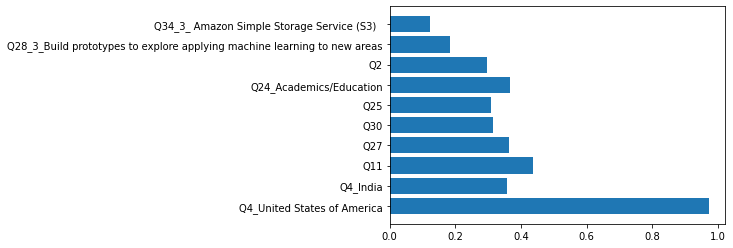

In [ ]:
# plot feature importance
plt.barh(range(X_train2.shape[1]), importance)
plt.yticks(range(X_train2.shape[1]), X_train2.columns)
plt.show()

 The bar plot of the feature importance is shown below. Compared with the previous correlation plot, the respondent living in the United States of America has the highest score in both plots. However, the degree of importance of other variables in the plots are slightly different. The degree of importance of Q11 and Q24_Academics/Education are higher to adjacent variables（Q11 vs. Q4_India; Q24_Academics/Education vs. Q2) in the feature importance plot generated using ordinal logistic regression, while not in correlation plot.

### Q5. Testing and Discussion

Overall, we have fine tuned the hyperparameters for ordinal logistic regression by setting C = 0.5 and solver = "newton-cg". In order to evaluate our model, we applied the model to the testing dataset.

In [ ]:
# accuracy on tesing dataset
prob_list_test = olr(X_train2, y_train2, X_test2, y_test2, 0.5, "newton-cg")
# compute accuracy
count_test = 0
for i in range(len(y_test2.tolist())):
  if y_test2.tolist()[i] == prob_list_test[i]:
    count_test += 1
accuracy_test = (count_test/len(y_test2.tolist()))*100
print ("Average Accuracy: {}%".format(round(np.mean(accuracy_test),3)))

Average Accuracy: 40.614%


In [ ]:
# accuracy on training dataset
prob_list_train = olr(X_train2, y_train2, X_train2, y_train2, 0.5, "newton-cg")
# compute accuracy
count_train = 0
for i in range(len(y_train2.tolist())):
  if y_train2.tolist()[i] == prob_list_train[i]:
    count_train += 1
accuracy_train = (count_train/len(y_train2.tolist()))*100
print ("Average Accuracy: {}%".format(round(np.mean(accuracy_train),3)))

Average Accuracy: 40.964%


By comparing the average accuracy on training dataset and testing dataset, the model performed better on training dataset(40.964% vs. 40.614%). However, both average accuracy are not a good result. This may indicate that the model is too simple to capture the important patterns in the data, resulting in poor performance on both training and testing data. Hence we may conclude the model is underfitting. One way to improve performance is to increase the model complexity by using other complex machine learning algorithms such as neural networks.


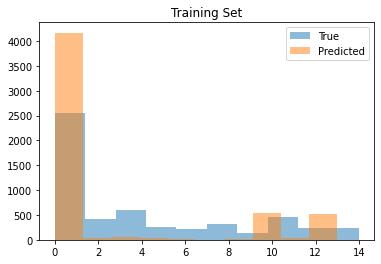

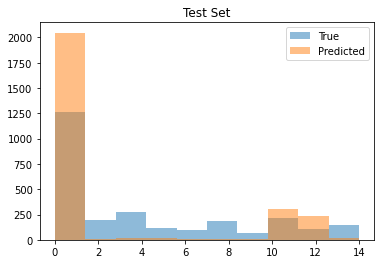

In [ ]:
# Plot training set distributions
plt.hist(y_train2.tolist(), alpha=0.5, label='True')
plt.hist(prob_list_train, alpha=0.5, label='Predicted')
plt.title('Training Set')
plt.legend()
plt.show()

# Plot test set distributions
plt.hist(y_test2.tolist(), alpha=0.5, label='True')
plt.hist(prob_list_test, alpha=0.5, label='Predicted')
plt.title('Test Set')
plt.legend()
plt.show()